In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
#lets describe the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [ ]:
#infromation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
#any null values
#not neccessary in above information we can see
df.isnull().values.any()

False

<Axes: >

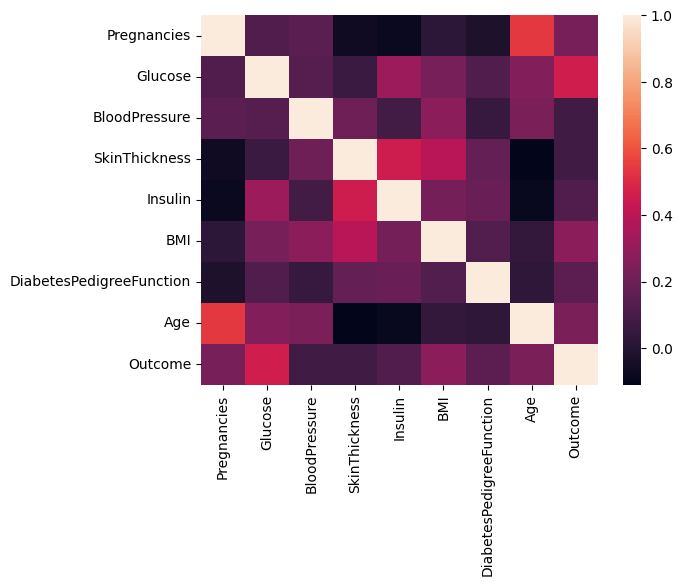

In [ ]:
#correlation

sns.heatmap(df.corr())
# we can see skin thickness,insulin,pregnencies and age are full independent to each other
#age and pregencies has negative correlation

<ipython-input-38-6535fc457b54>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Outcome'],palette='Set1')


<Axes: xlabel='count', ylabel='Outcome'>

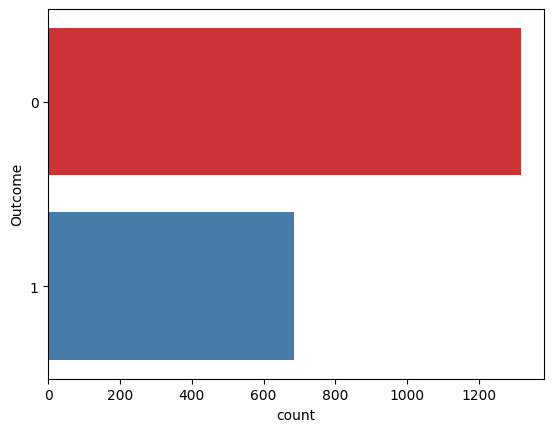

In [ ]:
#lets count total outcome in each target 0 1
#0 means no diabeted
#1 means patient with diabtes
sns.countplot(y=df['Outcome'],palette='Set1')

In [ ]:
#outlier remove

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)



---Q1--- 
 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               63.500
SkinThickness                0.000
Insulin                      0.000
BMI                         27.375
DiabetesPedigreeFunction     0.244
Age                         24.000
Outcome                      0.000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.000
Glucose                     141.000
BloodPressure                80.000
SkinThickness                32.000
Insulin                     130.000
BMI                          36.800
DiabetesPedigreeFunction      0.624
Age                          40.000
Outcome                       1.000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.000
Glucose                      42.000
BloodPressure                16.500
SkinThickness                32.000
Insulin                     130.000
BMI                           9.425
DiabetesPedigreeFunction      0.380
Age                 

In [ ]:
#outlier remove
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape
#more than 80 records deleted

((2000, 9), (1652, 9))

In [ ]:
#lets extract features and targets
X=df_out.drop(columns=['Outcome'])
y=df_out['Outcome']

In [ ]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [ ]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((1321, 8), (331, 8), (1321,), (331,))

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, log_loss  # Import roc_auc_score

# Initialize acc and roc lists
acc = []
roc = []
loss_values = []

loss = log_loss(test_y, y_probs)
loss_values.append(loss)

model=RandomForestClassifier()
model.fit(train_X,train_y)

y_pred=model.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))
print(f"Loss: {loss:.4f}")

#cross val score
result=cross_validate(model,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 1.0 ROC 1.0
Loss: 2.3325
TP:  [35 39 40 40 39 40 39 41 37 35]
TN:  [88 87 87 89 90 87 91 91 90 90]
FN:  [7 2 1 1 2 1 2 0 4 7]
FP:  [3 4 4 2 1 4 0 0 1 0]


,Actual,Predicted
1287,1,1
1447,0,0
1853,0,0
1275,0,0
1497,0,0


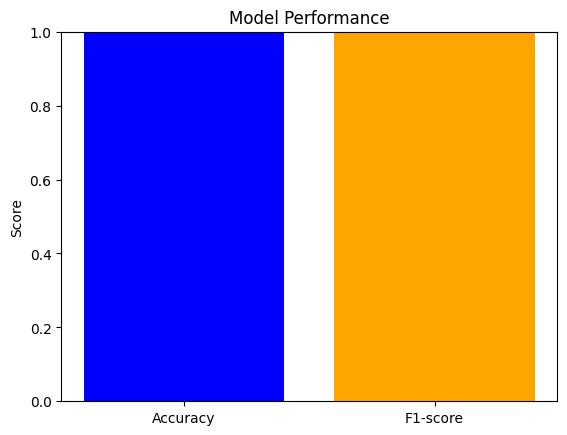

In [ ]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Calculate F1-score
f1 = f1_score(test_y, y_pred)

# Create a bar graph
metrics = ['Accuracy', 'F1-score']
values = [ac, f1]

plt.bar(metrics, values, color=['blue', 'orange'])
plt.title('Model Performance')
plt.ylabel('Score')
plt.ylim([0, 1])  # Set y-axis limits for better visualization
plt.show()

In [ ]:
import pandas as pd
from IPython.display import display

def predict_diabetes():
    # Get user input
    pregnancies = int(input("Enter Pregnancies: "))
    glucose = int(input("Enter Glucose: "))
    bloodpressure = int(input("Enter BloodPressure: "))
    skinthickness = int(input("Enter SkinThickness: "))
    insulin = int(input("Enter Insulin: "))
    bmi = float(input("Enter BMI: "))
    diabetespedigreefunction = float(input("Enter DiabetesPedigreeFunction: "))
    age = int(input("Enter Age: "))

    # Create a DataFrame with user input
    user_data = pd.DataFrame({
        'Pregnancies': [pregnancies],
        'Glucose': [glucose],
        'BloodPressure': [bloodpressure],
        'SkinThickness': [skinthickness],
        'Insulin': [insulin],
        'BMI': [bmi],
        'DiabetesPedigreeFunction': [diabetespedigreefunction],
        'Age': [age]
    })

    # Make prediction using the trained model (clf)
    prediction = model.predict(user_data)[0]

    # Display prediction
    if prediction == 0:
        print("The model predicts that the person does not have diabetes.")
    else:
      print("The model predicts that the person has diabetes.")

# Call the function to start prediction
predict_diabetes()

Enter Pregnancies: 2
Enter Glucose: 138
Enter BloodPressure: 62
Enter SkinThickness: 35
Enter Insulin: 0
Enter BMI: 33.6
Enter DiabetesPedigreeFunction: 0.127
Enter Age: 47
The model predicts that the person has diabetes.


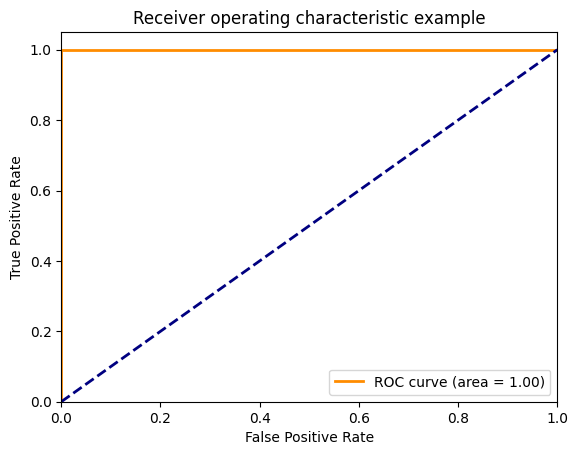

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_probs = model.predict_proba(test_X)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(test_y, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

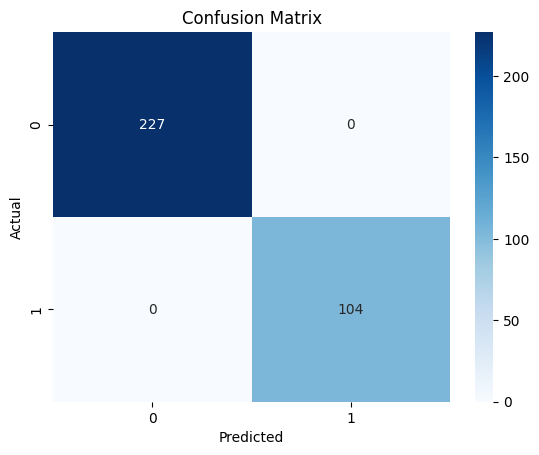

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns # Removed the extra indentation here

# Calculate confusion matrix
cm = confusion_matrix(test_y, y_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

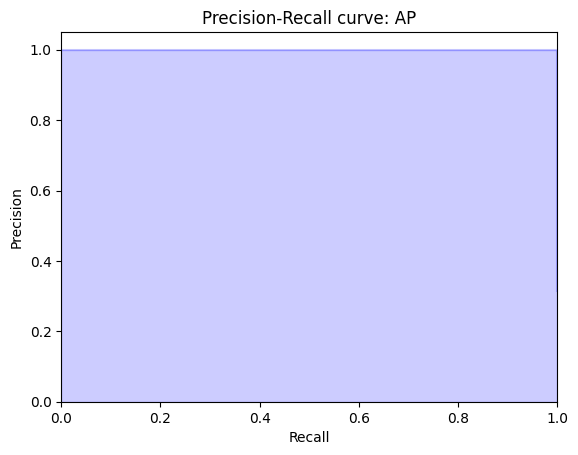

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get predicted probabilities
y_probs = model.predict_proba(test_X)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(test_y, y_probs)
average_precision = average_precision_score(test_y, y_probs)

# Plot precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP') # Fixed the incomplete title
plt.show() # Added plt.show() to display the plot

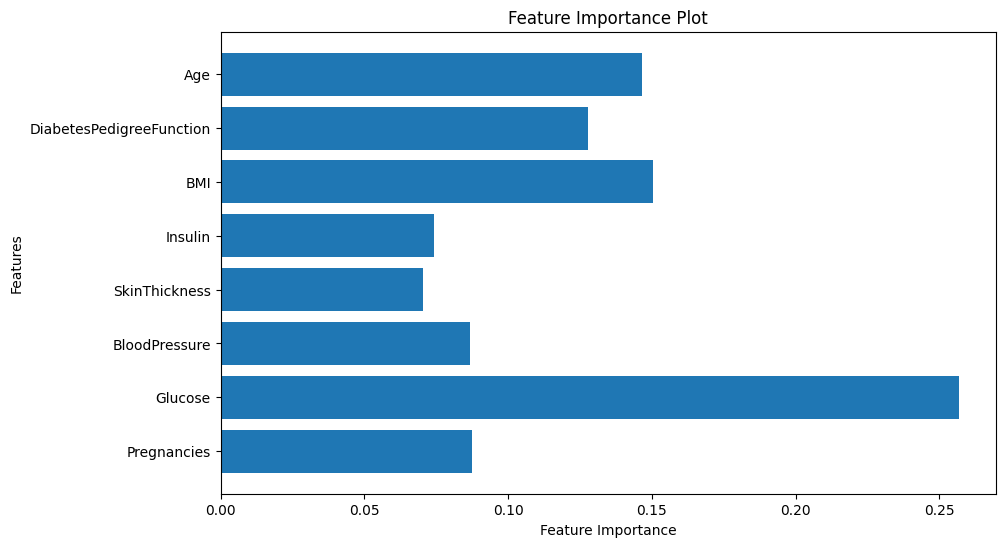

In [ ]:
importances = model.feature_importances_
feature_names = train_X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

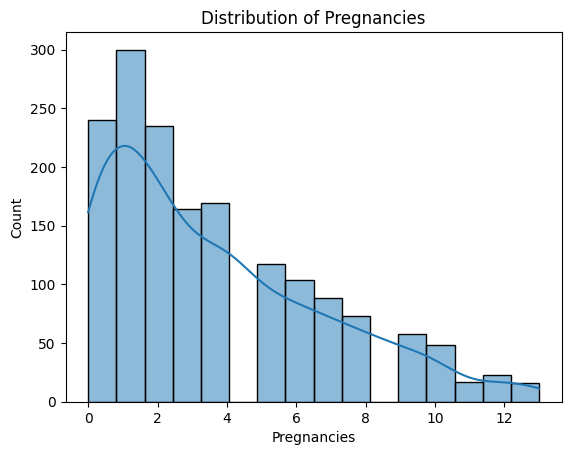

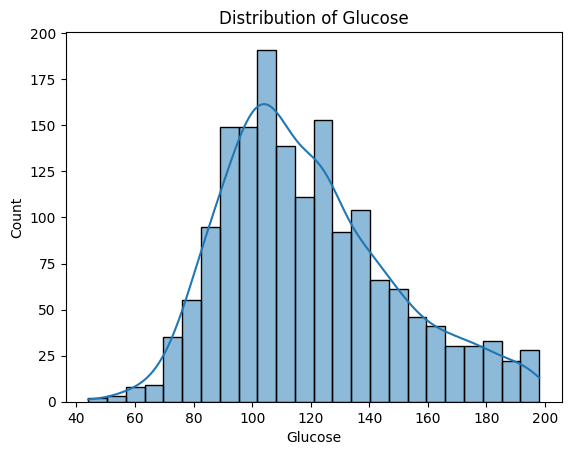

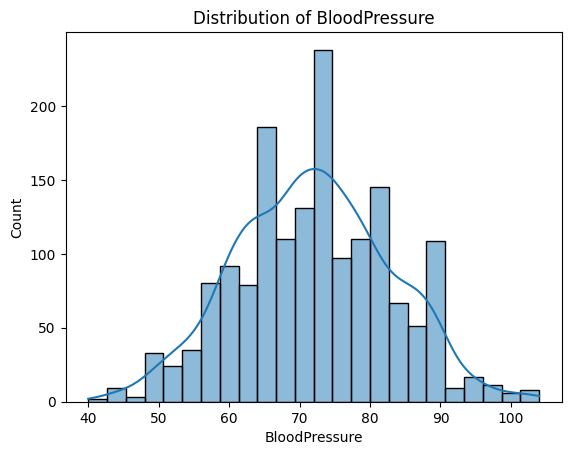

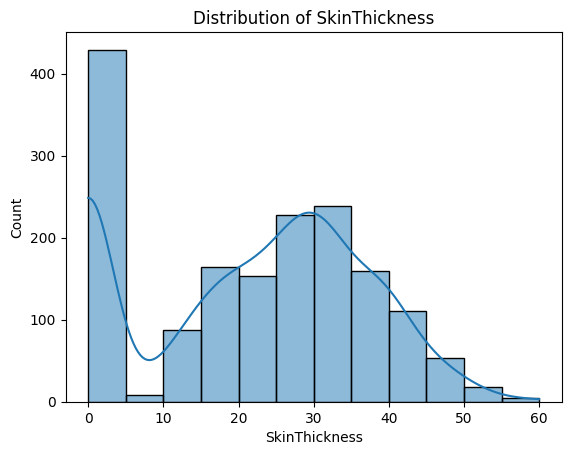

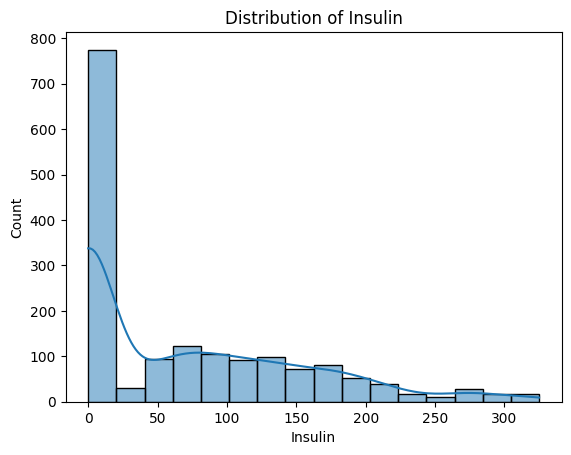

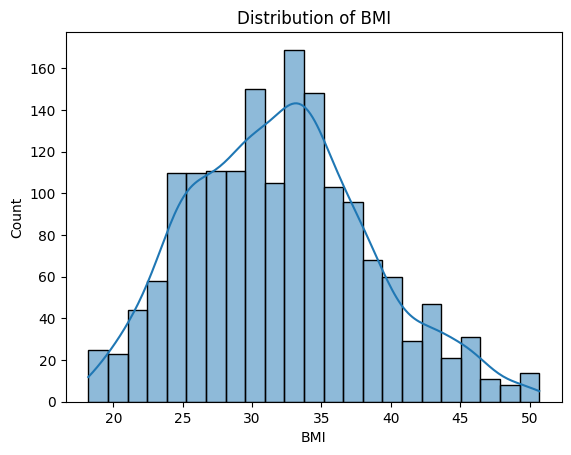

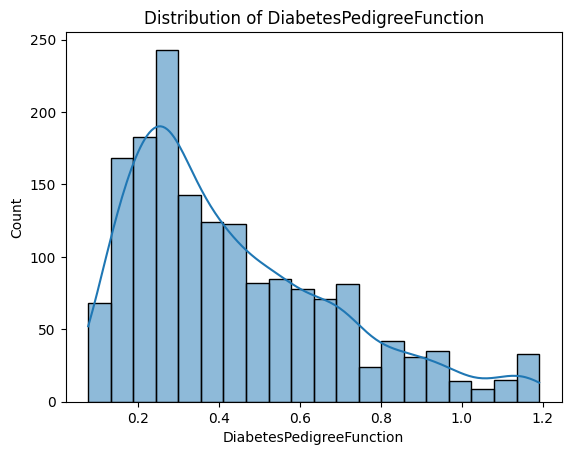

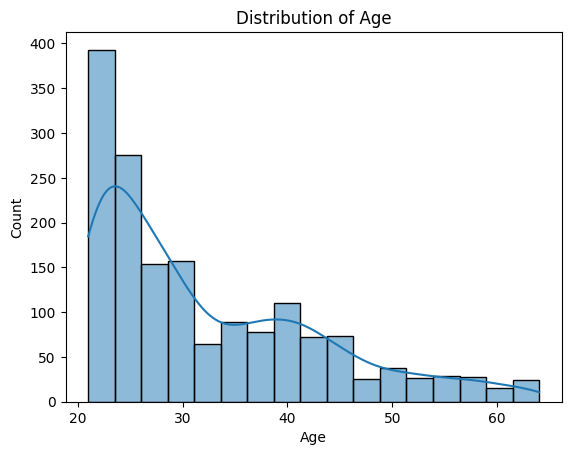

In [ ]:
for feature in feature_names:
       sns.histplot(df_out[feature], kde=True)
       plt.title(f'Distribution of {feature}')
       plt.show()

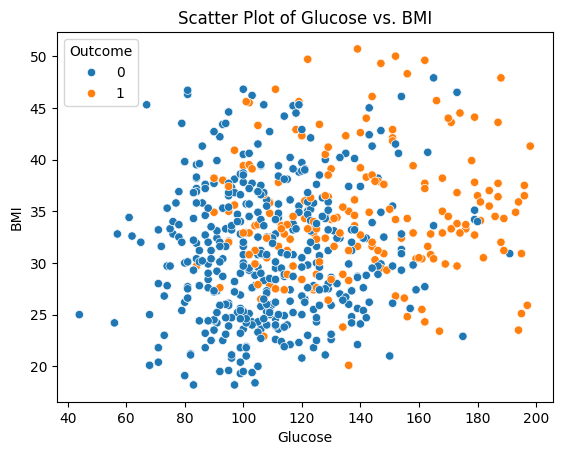

In [ ]:
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df_out)
plt.title('Scatter Plot of Glucose vs. BMI')
plt.show()
